##  Проект "Телекоммуникации"

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

Имеется несколько таблиц с данными:
- contract_new.csv — информация о договоре;
- personal_new.csv — персональные данные клиента;
- internet_new.csv — информация об интернет-услугах;
- phone_new.csv — информация об услугах телефонии.

## 1.Подготовка данных

##  Первым делом ознакомимся с общими данными.

In [1]:
!pip install phik

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# подгружаем нужные библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime 
from sklearn.metrics import roc_curve, roc_auc_score, auc
import phik
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix

In [3]:
# загрузим все 4 имеющиеся таблицы
try:
    contract = pd.read_csv('C:/Users/Пользователь/OneDrive/Документы/Python/contract_new.csv')
    personal = pd.read_csv('C:/Users/Пользователь/OneDrive/Документы/Python/personal_new.csv')
    internet = pd.read_csv('C:/Users/Пользователь/OneDrive/Документы/Python/internet_new.csv')
    phone = pd.read_csv('C:/Users/Пользователь/OneDrive/Документы/Python/phone_new.csv')
    
except:    
    contract = pd.read_csv('/datasets/contract_new.csv')
    personal = pd.read_csv('/datasets/personal_new.csv')
    internet = pd.read_csv('/datasets/internet_new.csv')
    phone = pd.read_csv('/datasets/phone_new.csv')    


In [4]:
# посмотрим на общие данные
contract.info()
contract.describe()
contract.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [5]:
# посмотрим на общие данные
personal.info()
personal.describe()
personal.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [6]:
# посмотрим на общие данные
internet.info()
internet.describe()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [7]:
# посмотрим на общие данные
phone.info()
phone.describe()
phone.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Таблицы имеют разное количество записей, тк отдельно приведены списки пользующихся услугами интернета и телефонии.Теперь проверим на пропуски и дубликаты.

In [8]:
# проверка на пропуски и дубликаты
print('Пропуски в contract:', contract.isna().sum())
print('Дубликаты в contract:', contract.duplicated().sum())

Пропуски в contract: customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64
Дубликаты в contract: 0


In [9]:
# проверка на пропуски и дубликаты
print('Пропуски в personal:', personal.isna().sum())
print('Дубликаты в personal:', personal.duplicated().sum())

Пропуски в personal: customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64
Дубликаты в personal: 0


In [10]:
# проверка на пропуски и дубликаты
print('Пропуски в internet:', internet.isna().sum())
print('Дубликаты в internet:', internet.duplicated().sum())

Пропуски в internet: customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64
Дубликаты в internet: 0


In [11]:
# проверка на пропуски и дубликаты
print('Пропуски в phone:', phone.isna().sum())
print('Дубликаты в phone:', phone.duplicated().sum())

Пропуски в phone: customerID       0
MultipleLines    0
dtype: int64
Дубликаты в phone: 0


Пропусков и явных дубликатов не обнаружено.

###  Предобработка данных

- создадим целевой признак (продолжает ли клиент пользоваться услугами «Ниединогоразрыва.ком» или нет).
- создадим еще один столбец и посчитаем количество дней пользования услугами «Ниединогоразрыва.ком».
- преобразуем столбец с общей суммой платежей в цифровой.

Но сначала приведем все названия столбцов к нижнему регистру.

In [12]:
# приводим названия столбцов к нижнему регистру
contract.columns = map(str.lower, contract.columns)
personal.columns = map(str.lower, personal.columns)
internet.columns = map(str.lower, internet.columns)
phone.columns = map(str.lower, phone.columns)

Приступим к созданию целевого признака.

In [13]:
def assign_category(category_value):
    if category_value == 'No' :
        return 1
    else:
        return 0
    
contract['target'] = contract['enddate'].apply(assign_category)
contract.head()

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,target
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,1
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,1
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,1
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,1
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,1


Пропуски в столбце enddate заменим на дату выгрузки.

Изменим тип данных столбца begindate и enddate с object на datetime64.

И добавим еще один столбец с количеством дней использования услуг.

Изменим тип данных в получившемся столбце на int.

In [14]:
contract['enddate'] = contract['enddate'].replace('No', '2020-02-01')
contract['begindate'] = pd.to_datetime(contract['begindate'],format='%Y.%m.%d')
contract['enddate'] = pd.to_datetime(contract['enddate'],format='%Y.%m.%d')
contract['days_of_use'] = contract['enddate'] - contract['begindate']
contract['days_of_use'] = contract['days_of_use'].dt.days
contract.head()

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,target,days_of_use
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,1,31
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,1,1036
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,1,123
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.6,1,1371
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.5,1,153


При попытке прямого изменения типа данных в колонке totalcharges происходит ошибка.Посмотрим на количество записей, которые нам мешают.

In [15]:
contract['totalcharges'] = pd.to_numeric(contract['totalcharges'], errors = 'coerce')
print('Пропуски в totalcharges:', contract['totalcharges'].isna().sum())

Пропуски в totalcharges: 11


Таких записей всего 11 штук. Можно их смело удалять, тк это никак не повлияет на проводимые исследования.

In [16]:
contract.dropna(subset = ['totalcharges'], inplace = True)
contract['totalcharges'] = pd.to_numeric(contract['totalcharges'])
contract.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7032 non-null   object        
 1   begindate         7032 non-null   datetime64[ns]
 2   enddate           7032 non-null   datetime64[ns]
 3   type              7032 non-null   object        
 4   paperlessbilling  7032 non-null   object        
 5   paymentmethod     7032 non-null   object        
 6   monthlycharges    7032 non-null   float64       
 7   totalcharges      7032 non-null   float64       
 8   target            7032 non-null   int64         
 9   days_of_use       7032 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 604.3+ KB


##  Предварительные выводы:

- в нашем распоряжении для дальнейшей работы есть почти полный датасет на 7032 записи(удалено было всего 11 записей).
- пропусков и дубликатов не обнаружено.
- все типы данных приведены к удобному формату для дальнейшей работы.
- создан дополнительный столбец 'days_of_use' для отображения количества дней с момента заключения договора.
- создан столбец с целевым признаком для дальнейшего построения моделей(пользуется сейчас аббонент услугами или нет).

##  Уточняющий вопрос:

Иначально целевой признак хотел добавить в последнюю очередь.
но код:

def assign_category(category_value):
    if category_value == '2020-02-01' :
        return 1
    else:
        return 0
    
contract['target'] = contract['enddate'].apply(assign_category)
contract.head()

не работает, после замены значений contract['enddate'] с 'No' на '2020-02-01' и изменения типа данных.
код запускается, но в столбце 'target' выдает только 0
поэтому выявление признака переехало в начало))

Как нужно было дописать функцию, чтобы все заработало?

##  План работы:

- объединить таблицы
- заполнить пропуски "заглушками"
- проанализировать законномерности среди отключившихся клиентов
- построить модели прогнозирования

## 2.Анализ данных

Первым делом объединим таблицы.

In [17]:
merged_table = contract.merge(personal, on='customerid', how='left')
merged_table = merged_table.merge(internet, on='customerid', how='left')
merged_table = merged_table.merge(phone, on='customerid', how='left')
merged_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7032 non-null   object        
 1   begindate         7032 non-null   datetime64[ns]
 2   enddate           7032 non-null   datetime64[ns]
 3   type              7032 non-null   object        
 4   paperlessbilling  7032 non-null   object        
 5   paymentmethod     7032 non-null   object        
 6   monthlycharges    7032 non-null   float64       
 7   totalcharges      7032 non-null   float64       
 8   target            7032 non-null   int64         
 9   days_of_use       7032 non-null   int64         
 10  gender            7032 non-null   object        
 11  seniorcitizen     7032 non-null   int64         
 12  partner           7032 non-null   object        
 13  dependents        7032 non-null   object        
 14  internetservice   5512 n

Все пропуски заполним заглушками.

In [18]:
merged_table = merged_table.fillna('not_used')
print('Пропуски в merged_table:', merged_table.isna().sum())

Пропуски в merged_table: customerid          0
begindate           0
enddate             0
type                0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
target              0
days_of_use         0
gender              0
seniorcitizen       0
partner             0
dependents          0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
multiplelines       0
dtype: int64


Перед корреляцией изменим тип данных в столбце seniorcitizen.

In [19]:
merged_table['seniorcitizen'] = merged_table['seniorcitizen'].astype(str)
merged_table['seniorcitizen'].info()

<class 'pandas.core.series.Series'>
Int64Index: 7032 entries, 0 to 7031
Series name: seniorcitizen
Non-Null Count  Dtype 
--------------  ----- 
7032 non-null   object
dtypes: object(1)
memory usage: 109.9+ KB


Взглянем на коллеряцию всех численных признаков.

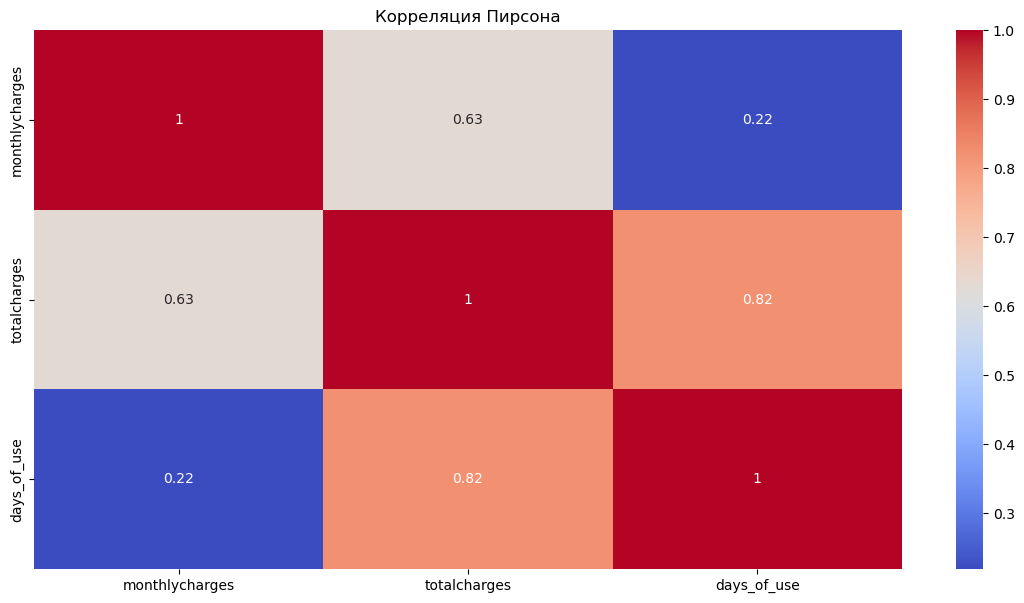

In [20]:
corr_matrix = merged_table[['monthlycharges','totalcharges','days_of_use']].corr()

plt.figure(figsize=(14, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляция Пирсона')
plt.show()


<div class="alert alert-info">
<b> Исправил</div>

Есть закономерность между общим количеством потраченных денег и временем со дня заключения договора.Что не удивительно))

И так же посмотрим на общую корреляцию с помощью библиотеки phik.

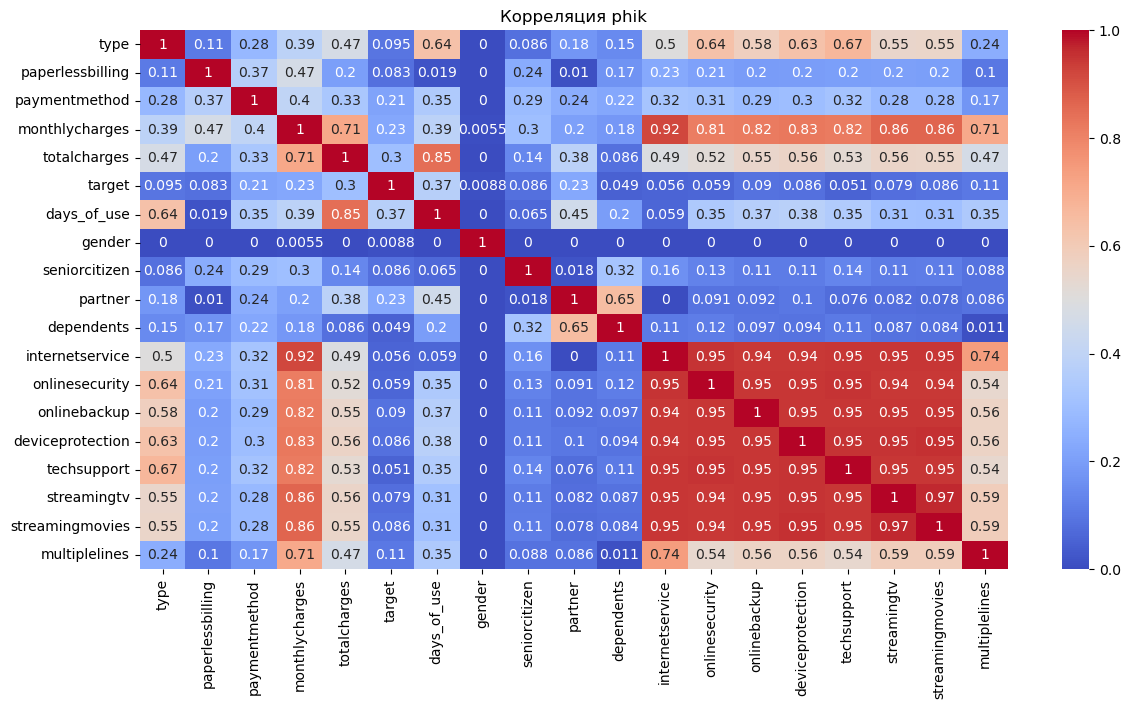

In [21]:
phik = merged_table.drop(['customerid','begindate','enddate'], axis=1)

phik = phik.phik_matrix(interval_cols = ['monthlycharges', 'totalcharges', 'days_of_use'])

plt.figure(figsize=(14, 7))
sns.heatmap(phik, annot=True, cmap='coolwarm')
plt.title('Корреляция phik')
plt.show()

Подтвердилась найденная ранее связь по корреляция Пирсона.И обнаружилась еще более сильная зависимость между InternetService и ежемесячными тратами на услуги. Непосредственно на target больше всего влияет days_of_use.Возможно большенство ушедших клиентов пользовались услугами только первый месяц.

При построении модели удалю столбец totalcharges, что бы избежать переобучения. и столбец gender, тк он практически ни на что не влият.

Добавим визуализации для сравнения target с остальными признаками.

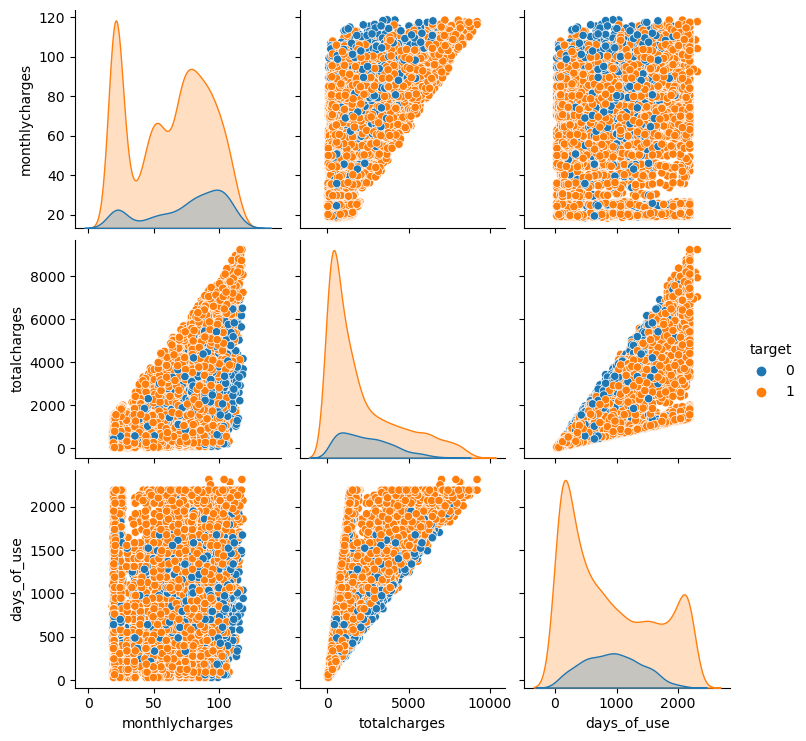

In [35]:
# Создание графиков для сравнения target с цифровыми признаками
sns.pairplot(merged_table, hue='target')
plt.show()

<Figure size 3000x3000 with 0 Axes>

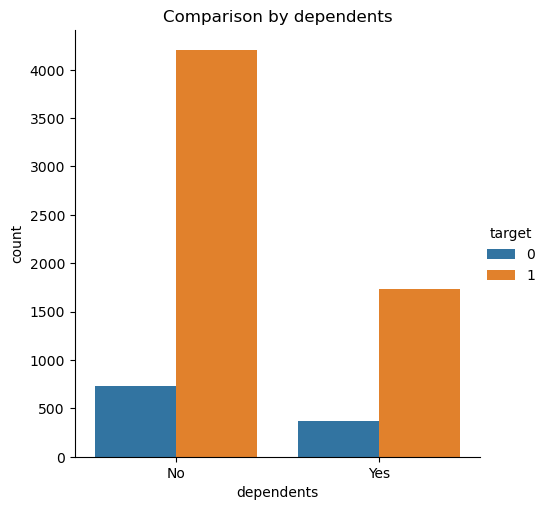

<Figure size 3000x3000 with 0 Axes>

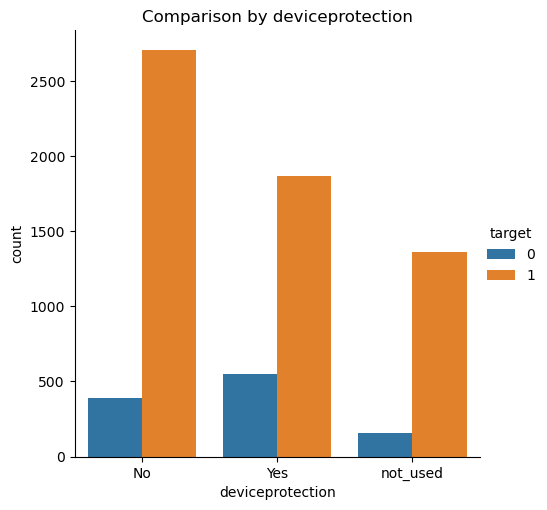

<Figure size 3000x3000 with 0 Axes>

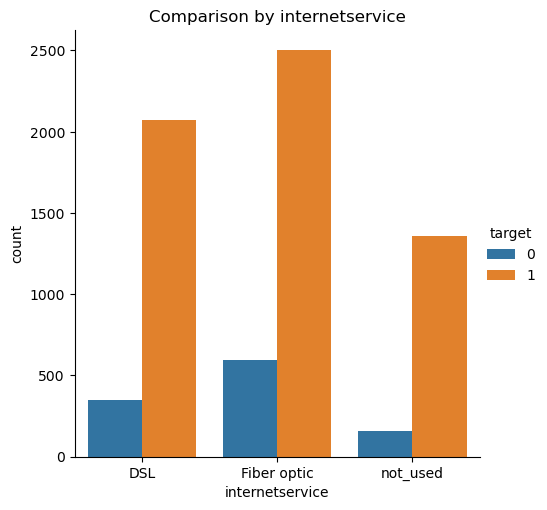

<Figure size 3000x3000 with 0 Axes>

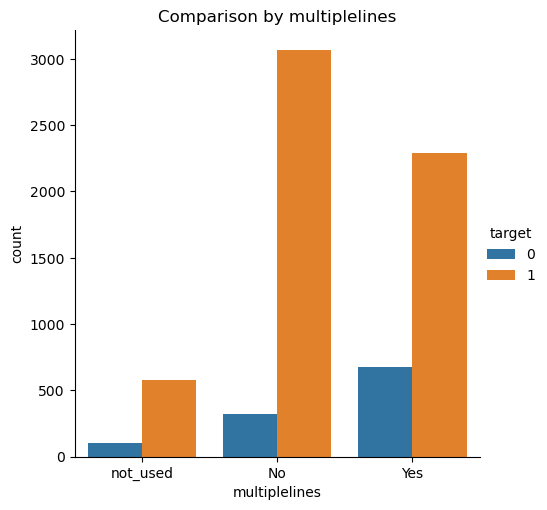

<Figure size 3000x3000 with 0 Axes>

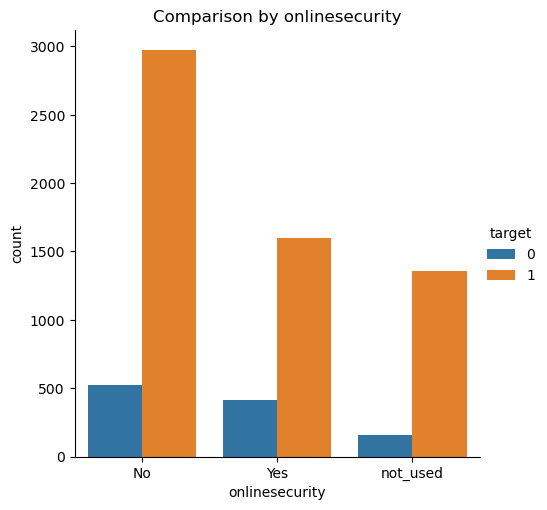

<Figure size 3000x3000 with 0 Axes>

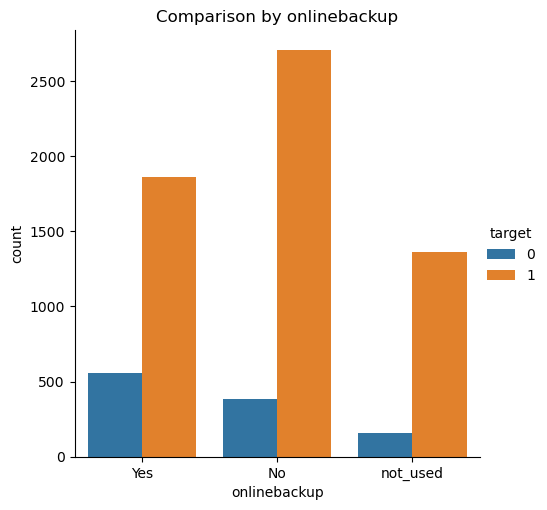

<Figure size 3000x3000 with 0 Axes>

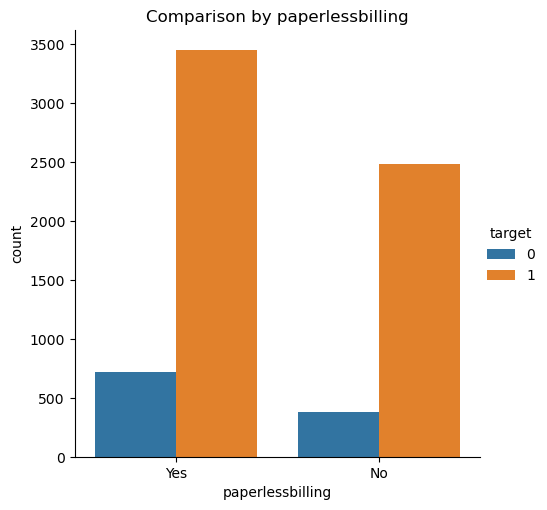

<Figure size 3000x3000 with 0 Axes>

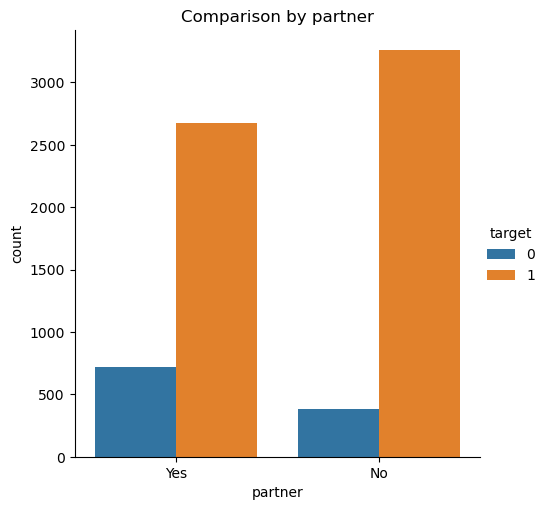

<Figure size 3000x3000 with 0 Axes>

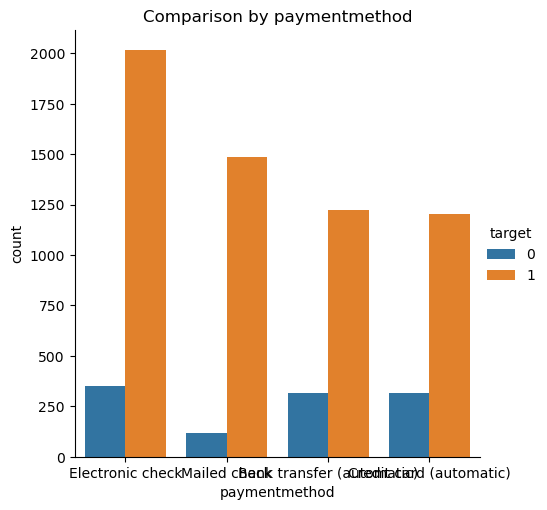

<Figure size 3000x3000 with 0 Axes>

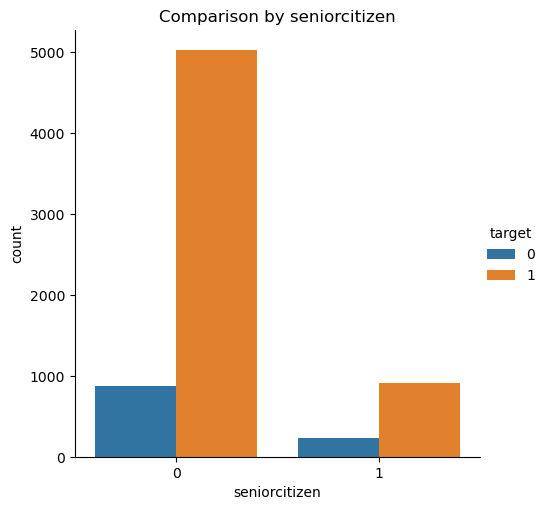

<Figure size 3000x3000 with 0 Axes>

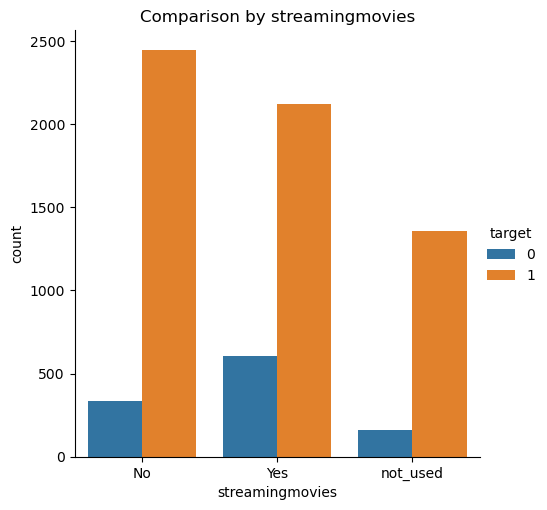

<Figure size 3000x3000 with 0 Axes>

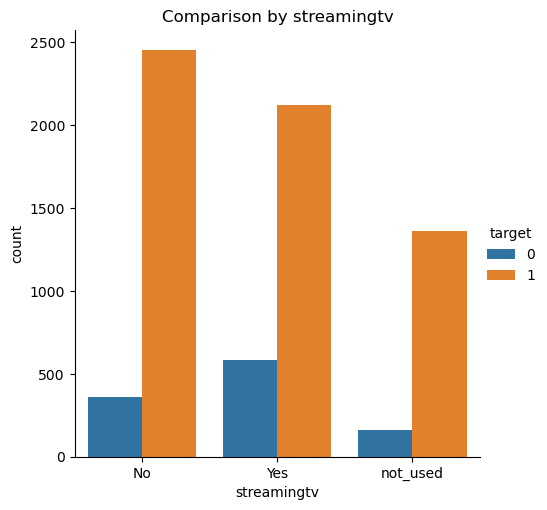

<Figure size 3000x3000 with 0 Axes>

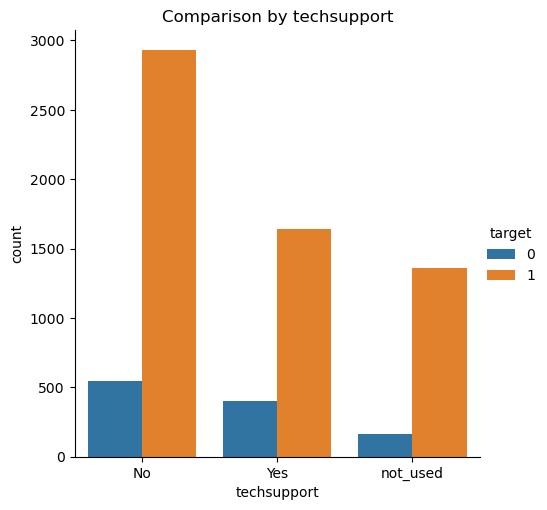

<Figure size 3000x3000 with 0 Axes>

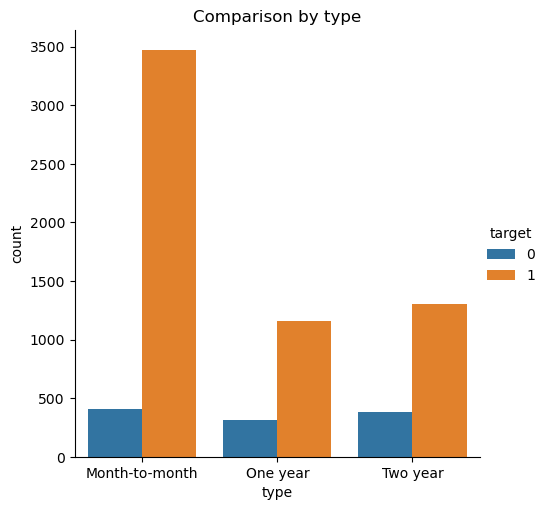

In [49]:
# Создание графиков для сравнения target с категориальными признаками

categorical_columns = ['dependents', 'deviceprotection', 'internetservice',
'multiplelines', 'onlinesecurity', 'onlinebackup', 'paperlessbilling', 'partner',
'paymentmethod', 'seniorcitizen', 'streamingmovies', 'streamingtv', 'techsupport', 'type']

for column in categorical_columns:
    plt.figure(figsize=(30, 30))
    sns.catplot(x=column, hue='target', data=merged_table, kind='count')
    plt.title(f'Comparison by {column}')
    plt.show()

По просмотренным графикам можно сделать следующие выводы:
- абоненты, пользующиеся onlinebackup значительно чаще перестают пользоваться услугами провайдера.
- абоненты, оплачивающие услуги черезE lectronic check уходят реше. А оплачивающие через Mailed check уходят чаще остальных.
- абоненты, пользующиеся streamingmovies значительно чаще перестают пользоваться услугами провайдера.
- абоненты, пользующиеся streamingtv значительно чаще перестают пользоваться услугами провайдера.
- абоненты, которые оплачивают услуги каждый месяц уходят значительно реже, чем которые заключают контракт на год или два.

Посмотрим на дисбаланс значений в target.

In [22]:
merged_table['target'].value_counts()

1    5931
0    1101
Name: target, dtype: int64

Перед построением модели удалим из датафрейма ненужные столбцы и обозначим target и features.

In [23]:
X = merged_table.drop(['customerid', 'begindate', 'enddate', 'totalcharges', 'gender', 'target'], axis=1)
y = merged_table['target']

И разобьем наш датасет на выборки 75-25.

In [24]:
#выделение тренировочной части в соотношении 75% и 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=310723)

In [25]:
#Код ревьюера
categorical_features = [col for col in X_train.columns if X_train[col].dtype == 'object']
categorical_features

['type',
 'paperlessbilling',
 'paymentmethod',
 'seniorcitizen',
 'partner',
 'dependents',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'multiplelines']

##  Предварительные выводы:

- обнаружена сильная зависимость между между общим количеством потраченных денег и временем со дня заключения договора. что бы избежать переобучаемости модели - столбец totalcharges удален.
- столбец gender практически не влияет на показатели, поэтому для ускорения работы он тоже удален.
- столбцы customerid, begindate, enddate удалены, тк не содержат нужной информации для построения модели.
- в столбце target обнаружен небольшой дисбаланс.
- обработка данных и анализ проведен успешно. можно переходить к построению моделей.

## 3.Построение модели.

Построим и сравним результаты ROC AUC у трех моделей:
- RandomForestClassifier
- CatBoostClassifier
- LGBMClassifier

1. RandomForestClassifier

Закодируем данные.

In [33]:
label_encoder = LabelEncoder()
for column in X_train.columns:
    if X_train[column].dtype == 'object':
        X_train[column] = label_encoder.fit_transform(X_train[column])
        X_test[column] = label_encoder.transform(X_test[column])

In [26]:
# Определение параметров для поиска наилучших
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Создание модели RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=310723)

# Подбор гиперпараметров с использованием GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, 
                           scoring='roc_auc', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Лучшие параметры и оценка модели
best_params = grid_search.best_params_
best_score_RFC= grid_search.best_score_

print("Лучшие параметры:", best_params)
print("Лучший показатель ROC AUC :", best_score_RFC)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Лучшие параметры: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Лучший показатель ROC AUC : 0.8301354427873268


Результат Случайного леса 0.8301354427873268. Этого недостаточно. Переходим к построению следующих моделей.

2. CatBoostClassifier

In [27]:


# Определение параметров для поиска наилучших
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5]
}

# Создание модели CatBoostClassifier
catboost_classifier = CatBoostClassifier(random_seed=310723, verbose=0)

# Подбор гиперпараметров с использованием GridSearchCV
grid_search = GridSearchCV(estimator=catboost_classifier, param_grid=param_grid, 
                           scoring='roc_auc', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Лучшие параметры и оценка модели
best_params = grid_search.best_params_
best_score_Cat = grid_search.best_score_

print("Лучшие параметры:", best_params)
print("Лучший показатель ROC AUC :", best_score_Cat)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Лучшие параметры: {'depth': 4, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.2}
Лучший показатель ROC AUC : 0.9188107642338388


Результат CatBoost 0.9188107642338388. Желаемый рубеж в 0.9 достигнут. Отлично! Переходим к построению LGBM.

3. LGBMClassifier

In [28]:


# Преобразование данных в формат, подходящий для LightGBM
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_features)
test_data = lgb.Dataset(X_test, label=y_test, categorical_feature=categorical_features, reference=train_data)

# Определение параметров для поиска наилучших
param_grid = {
    'num_leaves': [20, 30, 40],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_samples': [10, 20, 30],
#     'num_threads':[1] #Код ревьюера
}

# Создание модели LightGBM
lgb_classifier = lgb.LGBMClassifier(random_state=310723, silent=True)

# Подбор гиперпараметров с использованием GridSearchCV
grid_search = GridSearchCV(estimator=lgb_classifier, param_grid=param_grid, 
                           scoring='roc_auc', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Лучшие параметры и оценка модели
best_params = grid_search.best_params_
best_score_LGBM = grid_search.best_score_

print("Лучшие параметры:", best_params)
print("Лучший показатель ROC AUC :", best_score_LGBM)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Лучшие параметры: {'learning_rate': 0.2, 'max_depth': 6, 'min_child_samples': 10, 'num_leaves': 20}
Лучший показатель ROC AUC : 0.8946855484332443


C:\Users\Пользователь\AppData\Roaming\Python\Python39\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Результат LGBM 0.8946855484332443. Тоже хороший результат, но все же немного проигрывает CatBoost.

Победителем с лучшим показатем ROC AUC становится модель CatBoostClassifier!!!

Честно говоря не было сомнений, что в финальном проекте от Яндекса победит именно CatBoost))

## - CatBoostClassifier = 0.9188107642338388
## - LGBMClassifier = 0.8946855484332443
## - RandomForestClassifier = 0.8301354427873268

## 4.Тестирование модели.

- протестируем нашу модель на тестовой выборке.
- построим ROC кривую.
- проведем анализ важности признаков.
- визуализируем матрицу ошибок.

In [29]:
# Кодирование категориальных признаков
label_encoder = LabelEncoder()
categorical_features = [col for col in X_train.columns if X_train[col].dtype == 'object']
for col in categorical_features:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

# Создание модели CatBoostClassifier
catboost_classifier = CatBoostClassifier(
    depth=4,
    iterations=300,
    learning_rate=0.2,
    l2_leaf_reg=1,
    random_seed=310723,
    verbose=0
)

# Обучение модели на тренировочной выборке
catboost_classifier.fit(X_train, y_train)

# Предсказание вероятностей на тестовой выборке
y_pred_proba = catboost_classifier.predict_proba(X_test)[:, 1]

# Вычисление ROC AUC на тестовой выборке
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("ROC AUC на тестовой выборке:", roc_auc)


ROC AUC на тестовой выборке: 0.9327556925175933


Показатели ROC AUC на тестовой выборке даже немного выше, чем на основной. Значит признаем модель рабочей.

Теперь посмотрим на ROC кривую.

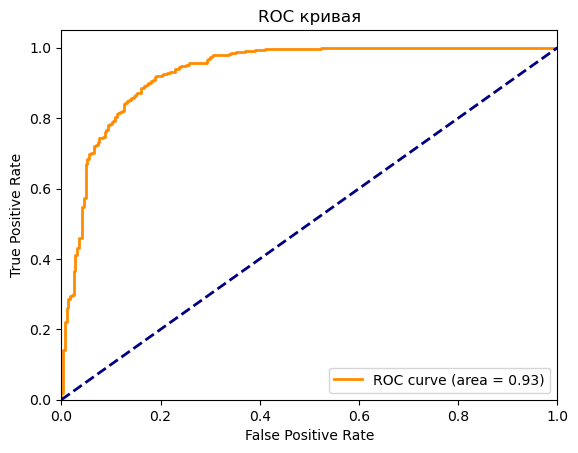

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC кривая')
plt.legend(loc="lower right")
plt.show()

Отлиный результат! Под нашей кривой располагается площадь в 93%

Теперь визуализируем матрицу ошибок.

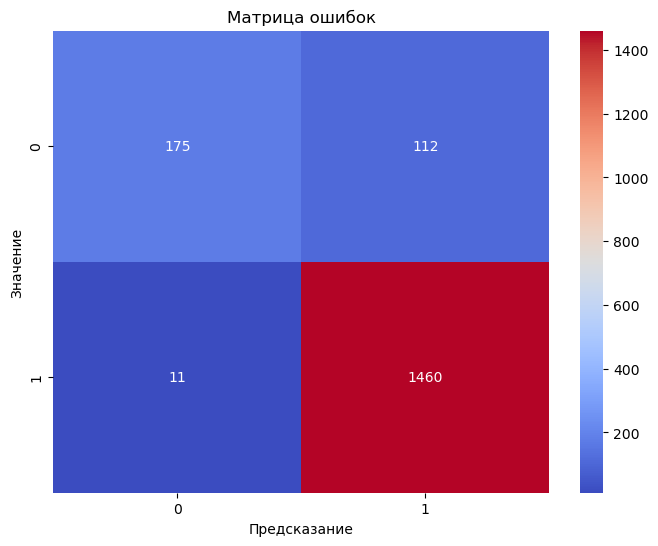

In [31]:
y_pred = catboost_classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Предсказание')
plt.ylabel('Значение')
plt.title('Матрица ошибок')
plt.show()

Показатель тот же. Общее количество верных предсказаний - 93%

И закончим наше иследование графиком важности признаков для построения модели.

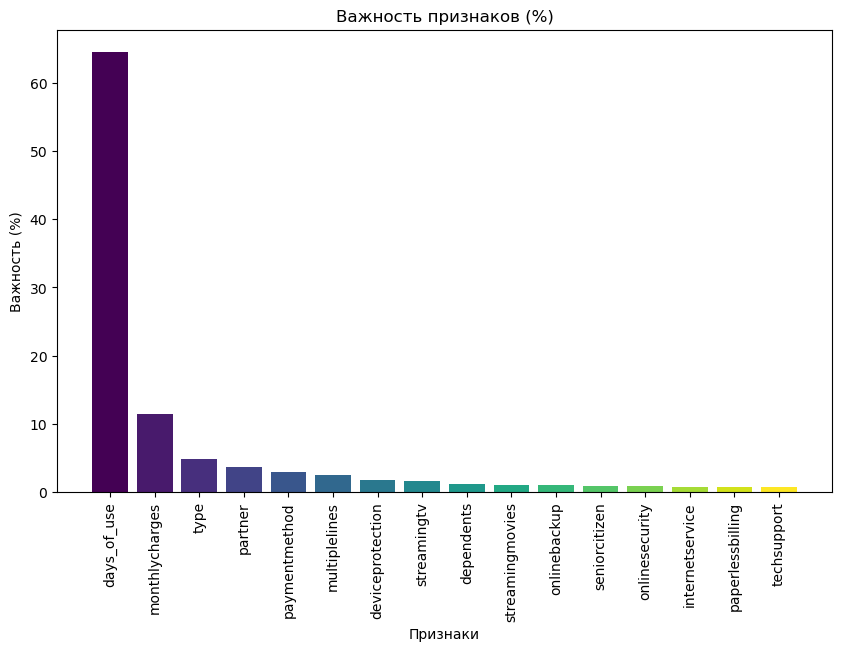

In [32]:
# Получение важности признаков
feature_importance = catboost_classifier.get_feature_importance()

# Получение названий признаков
feature_names = X_train.columns

# Сортировка по важности
sorted_idx = np.argsort(feature_importance)[::-1]

total_importance = np.sum(feature_importance)
feature_importance_percent = (feature_importance / total_importance) * 100

colors = plt.cm.viridis(np.linspace(0, 1, len(feature_names)))
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance_percent)), feature_importance_percent[sorted_idx], align='center', color=colors)
plt.xticks(range(len(feature_importance_percent)), np.array(feature_names)[sorted_idx], rotation='vertical')
plt.xlabel('Признаки')
plt.ylabel('Важность (%)')
plt.title('Важность признаков (%)')
plt.show()

Тут с огромным отрывом лидурует созданный ранее нами столбец с количеством дней пользования услугами. Единственный признак, которому еще удалось перешагнуть планку в 10% - ежемесячные траты на услуги.Думаю, что последние 5 столбцов этого рейтинга можно смело удалить, что не скажется на точности обучения, однако ускорит работу модели.

## 3.Отчет по решению.

Вопросы:
- Какие пункты плана были выполнены, а какие — нет. Почему?
- Какие трудности возникли и как вы их преодолели?
- Какие ключевые шаги в решении задачи вы выделили?
- Какие признаки использовали для обучения модели и какая предобработка этих признаков была выполнена?
- Какая ваша итоговая модель, какие у неё гиперпараметы и какое качество?

Ответы:

- Все пункты плна были выполнены.

- В работе над проектом столкнулся с несколькими трудностями. Не сразу получилось объединить все в единую таблицу, без потерь. Дальше много времени потратил на изучение и применение корреляции с помощью библиотеки phik.

- Ключевыми шагами в решение задачи было объединение таблиц в единый датасет. И создание двух дополнительных признаков : количество дней пользования услугами провайдера и непосредственно таргет, показывающий продолжает клиент пользоваться услугами или нет.

- При обучении модкели использовались практически все доступные признаки. Удалил только столбец totalcharges, что бы избежать переобучения. И столбец гендер, тк он практитески не коррелирует с остальными признаками. Как выяснилось позже для ускорения работы модели легко можно удалить еще несколько признаков без сильной потери качества работы модели.
- Что касается предобработки, то тут были удалены столбцы с датами начала и конца пользования услугами и заменены на столбец с количеством дней пользования. Создан target в виде ключего для нас значения : продолжает ли клиент пользоваться услугами или нет.Так же в ходе работы над проектом были изменены типы данных некоторых столбцов. объединены данные нам изначально 4 таблицы в единый датасет. Пропуски заполнены заглушками "not_used"

- В состязании трех моделей лучший показатель ROC AUC (0.9188 на обучающей и 0.9327 на тестовой)показала модель CatBoostClassifier со следующими параметрами: depth(отвечает за глубину деревьев)=4, iterations(указывает на количество итераций)=300, learning_rate(определяет шаг, с которым модель корректирует предсказания на каждой итерации обучения)=0.2, l2_leaf_reg(отвечает за гребневую регуляризацию)=1, random_seed(генератора случайных чисел)=310723.

- Общий итог. Была проделана работа по предобработке и исследованию базы данных оператора связи «Ниединогоразрыва.ком». С целью научиться прогнозировать отток клиентов и соответственно принять меры во избежание этого процесса.
Было обучено и сопаставлено 3 модели. 2 из которых показали очень высокий результат прогнозирования. Но все же лучшей моделью для поставленной задачи является модель CatBoostClassifier.